In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
# read in the csv data into a pandas data frame and set the date as the index
df = pd.read_csv('JaipurFinalCleanData.csv').set_index('date')

# execute the describe() function and transpose the output so that it doesn't overflow the width of the screen
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantempm,676.0,26.053254,6.208964,10.00,20.0000,28.000,30.000,38.00
maxtempm,676.0,32.523669,5.987966,18.00,28.0000,33.000,37.000,46.00
mintempm,676.0,19.630178,6.825827,3.00,13.0000,22.000,25.000,32.00
meantempm_1,676.0,26.066568,6.218491,10.00,20.0000,28.000,30.000,38.00
meantempm_2,676.0,26.081361,6.230216,10.00,20.0000,28.000,30.000,38.00
meantempm_3,676.0,26.093195,6.237655,10.00,20.0000,28.000,30.000,38.00
meandewptm_1,676.0,11.995562,8.731127,-10.00,5.0000,10.000,21.000,26.00
meandewptm_2,676.0,11.995562,8.731127,-10.00,5.0000,10.000,21.000,26.00
meandewptm_3,676.0,11.989645,8.738584,-10.00,5.0000,10.000,21.000,26.00
meanpressurem_1,676.0,1009.499911,6.481713,997.63,1003.6975,1008.830,1015.525,1023.43


In [4]:
# execute the info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 2016-05-04 to 2018-03-11
Data columns (total 39 columns):
meantempm          676 non-null int64
maxtempm           676 non-null int64
mintempm           676 non-null int64
meantempm_1        676 non-null float64
meantempm_2        676 non-null float64
meantempm_3        676 non-null float64
meandewptm_1       676 non-null float64
meandewptm_2       676 non-null float64
meandewptm_3       676 non-null float64
meanpressurem_1    676 non-null float64
meanpressurem_2    676 non-null float64
meanpressurem_3    676 non-null float64
maxhumidity_1      676 non-null float64
maxhumidity_2      676 non-null float64
maxhumidity_3      676 non-null float64
minhumidity_1      676 non-null float64
minhumidity_2      676 non-null float64
minhumidity_3      676 non-null float64
maxtempm_1         676 non-null float64
maxtempm_2         676 non-null float64
maxtempm_3         676 non-null float64
mintempm_1         676 non-null float64
mintempm_2

In [5]:
# First drop the maxtempm and mintempm from the dataframe
df = df.drop(['mintempm', 'maxtempm'], axis=1)

# X will be a pandas dataframe of all columns except meantempm
X = df[[col for col in df.columns if col != 'meantempm']]

# y will be a pandas series of the meantempm
y = df['meantempm']

In [6]:
# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [7]:
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   540, Training features   36
Validation instances 68, Validation features 36
Testing instances    68, Testing features    36


In [8]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [9]:
tf.VERSION #to check it has the latest version over 1.21 if not then install with conda update -f -c conda-forge tensorflow

'1.5.0'

In [10]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000223EC513C18>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [11]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=260): # 260 is used as we have approx 570 dataset for training
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [12]:
evaluations = []
STEPS = 260
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluation = regressor.evaluate(input_fn=wx_input_fn(X_val, y_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 265373.1, step = 1
INFO:tensorflow:global_step/sec: 66.1381
INFO:tensorflow:loss = 10063.752, step = 101 (1.481 sec)
INFO:tensorflow:global_step/sec: 75.7264
INFO:tensorflow:loss = 7852.917, step = 201 (1.336 sec)
INFO:tensorflow:Saving checkpoints for 260 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 7457.0317.
INFO:tensorflow:Starting evaluation at 2018-04-07-22:18:24
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-260
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-04-07-22:18:26
INFO:tensorflow:Saving dict for global step 260: average_loss = 28.727076, global_step = 260, loss = 1953.4412
INFO:tensorflow:Starting evaluation at 2018-04-07-22:18:27
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-260
INFO:tensorflow:Finished evaluation at 2018-04-07-22:18:27
INFO:tensor

INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-1820
INFO:tensorflow:Saving checkpoints for 1821 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2750.9792, step = 1821
INFO:tensorflow:global_step/sec: 74.3314
INFO:tensorflow:loss = 3116.747, step = 1921 (1.354 sec)
INFO:tensorflow:global_step/sec: 76.9515
INFO:tensorflow:loss = 2258.403, step = 2021 (1.306 sec)
INFO:tensorflow:Saving checkpoints for 2080 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2547.156.
INFO:tensorflow:Starting evaluation at 2018-04-07-22:20:05
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2080
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-04-07-22:20:06
INFO:tensorflow:Saving dict for global step 2080: average_loss = 10.044876, global_step = 2080, loss = 683.0516
INFO:tensorflow:Starting evaluation at 2018-04-07-22:20:07
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2080
INFO:tensorflow:Finished evaluati

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-3640
INFO:tensorflow:Saving checkpoints for 3641 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2112.7625, step = 3641
INFO:tensorflow:global_step/sec: 58.4154
INFO:tensorflow:loss = 1793.56, step = 3741 (1.721 sec)
INFO:tensorflow:global_step/sec: 81.7486
INFO:tensorflow:loss = 1920.2075, step = 3841 (1.232 sec)
INFO:tensorflow:Saving checkpoints for 3900 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1888.04.
INFO:tensorflow:Starting evaluation at 2018-04-07-22:21:46
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-3900
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-04-07-22:21:46
INFO:tensorflow:Saving dict for global step 3900: average_loss = 8.439751, global_step = 3900, loss = 573.9031
INFO:tensorflow:Starting evaluation at 2018-04-07-22:21:48
INFO:tensorflow:Restoring parameters from tf_wx_model\model.c

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-5460
INFO:tensorflow:Saving checkpoints for 5461 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1579.5342, step = 5461
INFO:tensorflow:global_step/sec: 44.6209
INFO:tensorflow:loss = 1655.4746, step = 5561 (2.257 sec)
INFO:tensorflow:global_step/sec: 80.994
INFO:tensorflow:loss = 1583.2957, step = 5661 (1.219 sec)
INFO:tensorflow:Saving checkpoints for 5720 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1520.8356.
INFO:tensorflow:Starting evaluation at 2018-04-07-22:23:28
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-5720
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-04-07-22:23:29
INFO:tensorflow:Saving dict for global step 5720: average_loss = 7.735728, global_step = 5720, loss = 526.0295
INFO:tensorflow:Starting evaluation at 2018-04-07-22:23:29
INFO:tensorflow:Restoring parameters from tf_wx_model\mode

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7280
INFO:tensorflow:Saving checkpoints for 7281 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1583.1992, step = 7281
INFO:tensorflow:global_step/sec: 67.1544
INFO:tensorflow:loss = 1326.1326, step = 7381 (1.489 sec)
INFO:tensorflow:global_step/sec: 92.0063
INFO:tensorflow:loss = 1533.3367, step = 7481 (1.105 sec)
INFO:tensorflow:Saving checkpoints for 7540 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1375.9088.
INFO:tensorflow:Starting evaluation at 2018-04-07-22:25:02
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7540
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-04-07-22:25:02
INFO:tensorflow:Saving dict for global step 7540: average_loss = 7.3037972, global_step = 7540, loss = 496.6582
INFO:tensorflow:Starting evaluation at 2018-04-07-22:25:04
INFO:tensorflow:Restoring parameters from tf_wx_model\mo

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-9100
INFO:tensorflow:Saving checkpoints for 9101 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1345.856, step = 9101
INFO:tensorflow:global_step/sec: 70.0726
INFO:tensorflow:loss = 1254.896, step = 9201 (1.427 sec)
INFO:tensorflow:global_step/sec: 88.2003
INFO:tensorflow:loss = 1611.8203, step = 9301 (1.158 sec)
INFO:tensorflow:Saving checkpoints for 9360 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1301.2888.
INFO:tensorflow:Starting evaluation at 2018-04-07-22:26:36
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-9360
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-04-07-22:26:36
INFO:tensorflow:Saving dict for global step 9360: average_loss = 7.0865154, global_step = 9360, loss = 481.88306
INFO:tensorflow:Starting evaluation at 2018-04-07-22:26:39
INFO:tensorflow:Restoring parameters from tf_wx_model\mod

INFO:tensorflow:Saving dict for global step 10920: average_loss = 6.9011617, global_step = 10920, loss = 469.279
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10920
INFO:tensorflow:Saving checkpoints for 10921 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1510.926, step = 10921
INFO:tensorflow:global_step/sec: 67.5909
INFO:tensorflow:loss = 1241.8544, step = 11021 (1.479 sec)
INFO:tensorflow:global_step/sec: 92.0296
INFO:tensorflow:loss = 960.4422, step = 11121 (1.111 sec)
INFO:tensorflow:Saving checkpoints for 11180 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1208.7461.
INFO:tensorflow:Starting evaluation at 2018-04-07-22:27:44
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-11180
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-04-07-22:27:44
INFO:tensorflow:Saving dict for global step 11180: average_loss = 6.776539, global_step = 11180, loss = 460.8

INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-12740
INFO:tensorflow:Finished evaluation at 2018-04-07-22:28:49
INFO:tensorflow:Saving dict for global step 12740: average_loss = 6.5691204, global_step = 12740, loss = 446.7002
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-12740
INFO:tensorflow:Saving checkpoints for 12741 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1202.706, step = 12741
INFO:tensorflow:global_step/sec: 67.896
INFO:tensorflow:loss = 1098.0645, step = 12841 (1.473 sec)
INFO:tensorflow:global_step/sec: 84.9798
INFO:tensorflow:loss = 1279.741, step = 12941 (1.186 sec)
INFO:tensorflow:Saving checkpoints for 13000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1056.2622.
INFO:tensorflow:Starting evaluation at 2018-04-07-22:29:00
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at

INFO:tensorflow:Saving dict for global step 14560: average_loss = 6.7861185, global_step = 14560, loss = 461.45605
INFO:tensorflow:Starting evaluation at 2018-04-07-22:29:58
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14560
INFO:tensorflow:Finished evaluation at 2018-04-07-22:29:58
INFO:tensorflow:Saving dict for global step 14560: average_loss = 6.7861185, global_step = 14560, loss = 461.45605
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14560
INFO:tensorflow:Saving checkpoints for 14561 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1095.6124, step = 14561
INFO:tensorflow:global_step/sec: 68.8331
INFO:tensorflow:loss = 1198.4502, step = 14661 (1.453 sec)
INFO:tensorflow:global_step/sec: 89.5195
INFO:tensorflow:loss = 1308.7532, step = 14761 (1.117 sec)
INFO:tensorflow:Saving checkpoints for 14820 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 958.4417.
INFO:tensorflow:Starting

INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-16380
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-04-07-22:31:10
INFO:tensorflow:Saving dict for global step 16380: average_loss = 6.21783, global_step = 16380, loss = 422.81244
INFO:tensorflow:Starting evaluation at 2018-04-07-22:31:12
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-16380
INFO:tensorflow:Finished evaluation at 2018-04-07-22:31:13
INFO:tensorflow:Saving dict for global step 16380: average_loss = 6.21783, global_step = 16380, loss = 422.81244
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-16380
INFO:tensorflow:Saving checkpoints for 16381 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 973.31805, step = 16381
INFO:tensorflow:global_step/sec: 61.9624
INFO:tensorflow:loss = 1124.5073, step = 16481 (1.614 sec)
INFO:tensorflow:global_step/sec: 90.7395
INFO:tensorflow:loss = 1130.1833, step = 1658

INFO:tensorflow:Loss for final step: 1060.1932.
INFO:tensorflow:Starting evaluation at 2018-04-07-22:32:44
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18200
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-04-07-22:32:44
INFO:tensorflow:Saving dict for global step 18200: average_loss = 6.1325874, global_step = 18200, loss = 417.01596
INFO:tensorflow:Starting evaluation at 2018-04-07-22:32:46
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18200
INFO:tensorflow:Finished evaluation at 2018-04-07-22:32:46
INFO:tensorflow:Saving dict for global step 18200: average_loss = 6.1325874, global_step = 18200, loss = 417.01596
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18200
INFO:tensorflow:Saving checkpoints for 18201 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1006.547, step = 18201
INFO:tensorflow:global_step/sec: 68.8514
INFO:tensorflow:loss = 1055.368, st

INFO:tensorflow:global_step/sec: 81.2225
INFO:tensorflow:loss = 880.6633, step = 19961 (1.236 sec)
INFO:tensorflow:Saving checkpoints for 20020 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 965.4729.
INFO:tensorflow:Starting evaluation at 2018-04-07-22:34:22
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-20020
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-04-07-22:34:22
INFO:tensorflow:Saving dict for global step 20020: average_loss = 5.988446, global_step = 20020, loss = 407.21436
INFO:tensorflow:Starting evaluation at 2018-04-07-22:34:24
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-20020
INFO:tensorflow:Finished evaluation at 2018-04-07-22:34:24
INFO:tensorflow:Saving dict for global step 20020: average_loss = 5.988446, global_step = 20020, loss = 407.21436
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-20020
INFO:tensorflow:Saving che

INFO:tensorflow:loss = 840.5303, step = 21581
INFO:tensorflow:global_step/sec: 67.6459
INFO:tensorflow:loss = 966.49133, step = 21681 (1.478 sec)
INFO:tensorflow:global_step/sec: 92.0067
INFO:tensorflow:loss = 999.4774, step = 21781 (1.103 sec)
INFO:tensorflow:Saving checkpoints for 21840 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 926.0468.
INFO:tensorflow:Starting evaluation at 2018-04-07-22:35:59
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21840
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-04-07-22:35:59
INFO:tensorflow:Saving dict for global step 21840: average_loss = 5.744753, global_step = 21840, loss = 390.6432
INFO:tensorflow:Starting evaluation at 2018-04-07-22:36:01
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21840
INFO:tensorflow:Finished evaluation at 2018-04-07-22:36:01
INFO:tensorflow:Saving dict for global step 21840: average_loss = 5.744753, global_step = 21840, loss = 390.64

INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-23400
INFO:tensorflow:Saving checkpoints for 23401 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 842.26764, step = 23401
INFO:tensorflow:global_step/sec: 70.2865
INFO:tensorflow:loss = 1031.2534, step = 23501 (1.434 sec)
INFO:tensorflow:global_step/sec: 90.9951
INFO:tensorflow:loss = 916.57745, step = 23601 (1.090 sec)
INFO:tensorflow:Saving checkpoints for 23660 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 921.09814.
INFO:tensorflow:Starting evaluation at 2018-04-07-22:37:34
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-23660
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-04-07-22:37:34
INFO:tensorflow:Saving dict for global step 23660: average_loss = 6.2197533, global_step = 23660, loss = 422.9432
INFO:tensorflow:Starting evaluation at 2018-04-07-22:37:36
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-23660
INFO:tensorflow:Fini

INFO:tensorflow:Saving dict for global step 25220: average_loss = 5.52198, global_step = 25220, loss = 375.49463
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-25220
INFO:tensorflow:Saving checkpoints for 25221 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 912.8828, step = 25221
INFO:tensorflow:global_step/sec: 73.7111
INFO:tensorflow:loss = 987.86584, step = 25321 (1.357 sec)
INFO:tensorflow:global_step/sec: 89.1077
INFO:tensorflow:loss = 706.67206, step = 25421 (1.131 sec)
INFO:tensorflow:Saving checkpoints for 25480 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 909.34314.
INFO:tensorflow:Starting evaluation at 2018-04-07-22:39:01
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-25480
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-04-07-22:39:01
INFO:tensorflow:Saving dict for global step 25480: average_loss = 5.5138063, global_step = 25480, loss = 374

In [13]:
evaluations[0]

{'average_loss': 28.727076, 'global_step': 260, 'loss': 1953.4412}

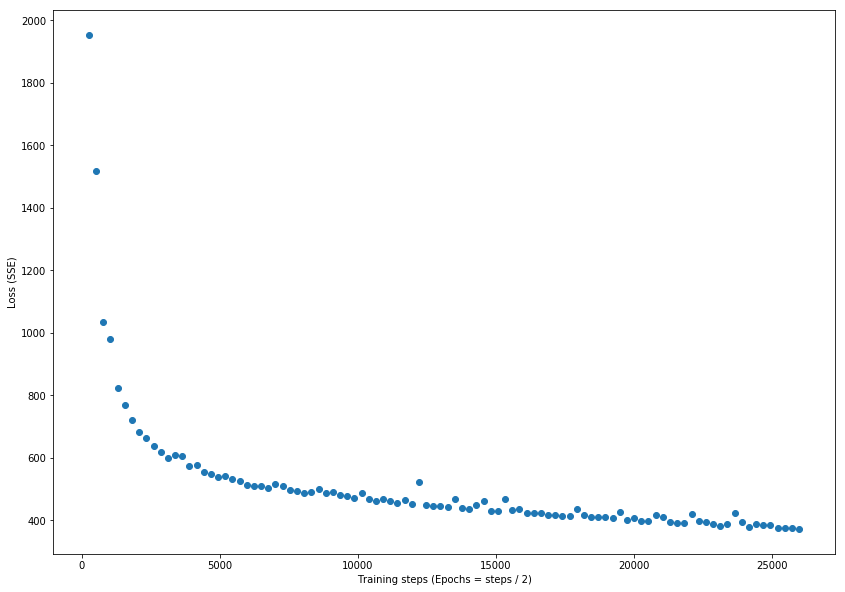

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()

In [15]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

print("The Explained Variance: %.2f" % explained_variance_score(
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f degrees Celcius" % mean_absolute_error(
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f degrees Celcius" % median_absolute_error(
                                            y_test, predictions))

INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-26000
The Explained Variance: 0.90
The Mean Absolute Error: 1.49 degrees Celcius
The Median Absolute Error: 0.94 degrees Celcius
